# Bibliotecas

In [1]:
# Caminhos
import utilitarios.caminhos as caminho

# Download dados
from utilitarios.download_dos_dados import download_dados

# Regressão linear
from utilitarios.modelo_regressao import regressao_linear, predicao_regressao

# Rede neural
from utilitarios.modelo_rede_neural import rede_neural, predicao_rede_neural

# Gerar imagens
from utilitarios.gerar_imagens import histograma, grafico_regressao_univariada, histograma_dos_erros, grafico_3d_multiplos_angulos

# Transformações dados
from utilitarios.transformacoes_dados import normalizacao, desnormalizar

# Funções estatisticas
from utilitarios.estatisticas import calcular_r_quadrado, criar_tabela

# Outros
from pathlib import Path
from random import sample, seed
seed(2025)

2025-06-26 20:55:17.847143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dados

## Baixando dados

In [2]:
dados = download_dados()
dados = dados.rename(columns = {"soc_can":"soc",
                                "soh_can":"soh"})

colunas_dados:list = dados.columns
print(f"Quantidade de dados: {len(dados)}")
dados.head(5)

'dados.zip' já existe em 'dados' !
ZIP já foi estraido!
Quantidade de dados: 20551


,soc,soh,current,voltage,latitude,longitude,speed,power
0,49.0,100.0,-67.890000,551.0,-22.815533,-47.072540,20.781167,-10.390942
1,49.0,100.0,-14.450000,550.0,-22.815494,-47.072527,16.103035,-2.207639
2,49.0,100.0,-34.810000,550.0,-22.815468,-47.072514,11.453521,-5.318194
3,49.0,100.0,-6.220000,550.0,-22.815439,-47.072507,11.682314,-0.950278
4,49.0,100.0,14.639999,550.0,-22.815408,-47.072498,12.833742,2.236667


## Estatísticas descritivas

In [3]:
dados.describe().to_csv(Path(caminho.tabelas, "resumo_descritivo.csv"))
dados.describe()

,soc,soh,current,voltage,latitude,longitude,speed,power
count,20550.000000,20550.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000
mean,69.620341,99.988856,47.835771,551.814899,-22.819732,-47.064836,21.322908,7.219094
std,17.362565,0.104976,149.940468,4.679411,0.005561,0.003642,12.999087,22.857912
min,41.000000,99.000000,-325.310000,537.200000,-22.829745,-47.072827,0.000000,-50.052597
25%,52.000000,100.000000,-37.675001,548.190909,-22.824356,-47.067447,11.345801,-5.779492
50%,72.000000,100.000000,19.680000,551.800000,-22.818475,-47.064880,21.708774,3.015500
75%,83.000000,100.000000,126.250000,555.100000,-22.814071,-47.061932,30.994378,19.385256
max,98.000000,100.000000,424.639980,562.000000,-22.812544,-47.057147,97.659085,64.203206


## Separando dados em treino e teste

In [4]:
proporcao_treino:float = 0.8
proporcao_teste:float = 1 - proporcao_treino

amostras_treino:int = int(proporcao_treino*len(dados))
amostras_teste:int = len(dados) - amostras_treino

lista_amostras_treino:list = sample(range(amostras_treino), amostras_treino)

dados_treino = dados.iloc[lista_amostras_treino].iloc[:2000]
dados_teste = dados.drop(index=lista_amostras_treino).sort_index().iloc[:1000]

print(f"Total de amostras de treino: {amostras_treino}\nTotal de amostras de teste: {amostras_teste}")

Total de amostras de treino: 16440
Total de amostras de teste: 4111


## Parâmetros globais dos dados

In [5]:
media_dados_treino:dict = {}
desvio_padrao_dados_treino:dict = {}

for coluna in dados_treino.columns:
    media_dados_treino[coluna] = dados_treino[coluna].mean()
    desvio_padrao_dados_treino[coluna] = dados_treino[coluna].std()


media_dados_teste:dict = {}
desvio_padrao_dados_teste:dict = {}

for coluna in dados_teste.columns:
    media_dados_teste[coluna] = dados_teste[coluna].mean()
    desvio_padrao_dados_teste[coluna] = dados_teste[coluna].std()

## Distribuição dos dados

In [6]:
for coluna in colunas_dados:
    histograma(dados = dados, coluna = coluna,
               salvar_em = Path(caminho.imagens_dados, f"distribuicao_dos_dados_de_{coluna}.png"),
               bins = 16)

/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/distribuicao_dos_dados/distribuicao_dos_dados_de_soc.png
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/distribuicao_dos_dados/distribuicao_dos_dados_de_soh.png
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in 

# Parâmetros para regressões

In [7]:
regressao_univariada:list = [{"X":["voltage"], "y":"power"},
                             {"X":["current"], "y":"power"},
                             {"X":["speed"], "y":"power"},
                             {"X":["latitude"], "y":"power"},
                             {"X":["longitude"], "y":"power"},
                             {"X":["soc"], "y":"power"},]

regressao_multivariada:list = [{"X":["current", "voltage", "speed"] , "y":"power"},
                               {"X":["current", "speed"] , "y":"power"},
                               {"X":["latitude", "longitude", "speed"] , "y":"power"},
                               {"X":["latitude", "longitude"] , "y":"power"},
                               {"X":["latitude", "speed"] , "y":"power"},
                               {"X":["longitude", "speed"] , "y":"power"}]

globais:dict = {}

criar_tabela(regressao_univariada, nome = "regressoes_univariadas.csv")
criar_tabela(regressao_multivariada, nome = "regressoes_multivariadas.csv")

# Regressão Linear clássica

## Univariada

In [8]:
for index, parametros in enumerate(regressao_univariada):
    regressao_univariada[index]["modelo_regressao"] = regressao_linear(dados = dados_treino, 
                                                                       X = parametros["X"], 
                                                                       y = parametros["y"])

    regressao_univariada[index]["y_treino_regressao"] = predicao_regressao(dados = dados_treino,
                                                                           modelo = parametros["modelo_regressao"],
                                                                           X = parametros["X"])

    residuos = regressao_univariada[index]["modelo_regressao"].resid
    mse = (residuos**2).mean()
    regressao_univariada[index]["mse_regressao"] = mse

    grafico_regressao_univariada(dados = dados_treino,
                                 X = parametros["X"],
                                 y = parametros["y"],
                                 real_y = regressao_univariada[index]["y_treino_regressao"],
                                 salvar_em = Path(caminho.imagens_regressao_previsao, f"dados_treino_{parametros["X"][0]}_{parametros["y"]}"))

/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/previsao/dados_treino_voltage_power
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/previsao/dados_treino_current_power
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/previsao/dados_treino_speed_power
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site

## Multivariada

In [9]:
for index, parametros in enumerate(regressao_multivariada):
    regressao_multivariada[index]["modelo_regressao"] = regressao_linear(dados = dados_treino, 
                                                                         X = parametros["X"], 
                                                                         y = parametros["y"])

    residuos = regressao_multivariada[index]["modelo_regressao"].resid
    mse = (residuos**2).mean()
    regressao_multivariada[index]["mse_regressao"] = mse

# Redes neurais

## Univariada

In [10]:
for index, parametros in enumerate(regressao_univariada):
    print(f"\rTreinando rede {index}/{len(regressao_univariada)}", end = "")
    regressao_univariada[index]["modelo_rede_neural"] = rede_neural(dados = normalizacao(dados_treino,
                                                                                         media = media_dados_treino,
                                                                                         desvio_padrao = desvio_padrao_dados_treino), 
                                                                    X = parametros["X"], 
                                                                    y = parametros["y"])

    regressao_univariada[index]["y_treino_rede_neural"] = predicao_rede_neural(dados = normalizacao(dados_treino,
                                                                                                    media = media_dados_treino,
                                                                                                    desvio_padrao = desvio_padrao_dados_treino), 
                                                                               modelo = parametros["modelo_rede_neural"], 
                                                                               X = parametros["X"])

    regressao_univariada[index]["y_treino_rede_neural"] = desnormalizar(regressao_univariada[index]["y_treino_rede_neural"],
                                                                        media = media_dados_treino[parametros["y"]],
                                                                        desvio_padrao = desvio_padrao_dados_treino[parametros["y"]])

    regressao_univariada[index]["mse_rede_neural"] = 1/len(dados_treino[parametros["y"]]) * float(sum([(real - estimado)**2 for real, estimado in zip(dados_treino[parametros["y"]], regressao_univariada[index]["y_treino_rede_neural"])]))

    grafico_regressao_univariada(dados = dados_treino,
                                 X = parametros["X"],
                                 y = parametros["y"],
                                 real_y = regressao_univariada[index]["y_treino_rede_neural"],
                                 salvar_em = Path(caminho.imagens_rede_neural_previsao, f"dados_treino_{parametros["X"][0]}_{parametros["y"]}"))


print(f"\rTreinando rede {len(regressao_univariada)}/{len(regressao_univariada)}")

Treinando rede 0/6

/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
2025-06-26 20:55:21.642921: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
/tmp/ipykernel_150311/2003026999.py:19: DeprecationWarning: Conversion o

Treinando rede 1/6

/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
/tmp/ipykernel_150311/2003026999.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/previsao/dados_treino_current_power


Treinando rede 2/6

/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
/tmp/ipykernel_150311/2003026999.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/previsao/dados_treino_speed_power


Treinando rede 3/6

/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
/tmp/ipykernel_150311/2003026999.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/previsao/dados_treino_latitude_power


Treinando rede 4/6

/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
/tmp/ipykernel_150311/2003026999.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/previsao/dados_treino_longitude_power


Treinando rede 5/6

/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
/tmp/ipykernel_150311/2003026999.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/previsao/dados_treino_soc_power


Treinando rede 6/6


## Multivariada

In [11]:
for index, parametros in enumerate(regressao_multivariada):
    print(f"\rTreinando rede {index}/{len(regressao_multivariada)}", end = "")
    regressao_multivariada[index]["modelo_rede_neural"] = rede_neural(dados = normalizacao(dados_treino,
                                                                                           media = media_dados_treino,
                                                                                           desvio_padrao = desvio_padrao_dados_treino), 
                                                                      X = parametros["X"], 
                                                                      y = parametros["y"])

    regressao_multivariada[index]["y_treino_rede_neural"] = predicao_rede_neural(dados = normalizacao(dados_treino,
                                                                                                       media = media_dados_treino,
                                                                                                       desvio_padrao = desvio_padrao_dados_treino), 
                                                                                  modelo = parametros["modelo_rede_neural"],
                                                                                  X = parametros["X"])

    regressao_multivariada[index]["y_treino_rede_neural"] = desnormalizar(regressao_multivariada[index]["y_treino_rede_neural"],
                                                                           media = media_dados_treino[parametros["y"]],
                                                                           desvio_padrao = desvio_padrao_dados_treino[parametros["y"]])

    regressao_multivariada[index]["mse_rede_neural"] = 1/len(dados_treino[parametros["y"]]) * float(sum([(real - estimado)**2 for real, estimado in zip(dados_treino[parametros["y"]], regressao_multivariada[index]["y_treino_rede_neural"])]))


    
print(f"\rTreinando rede {len(regressao_multivariada)}/{len(regressao_multivariada)}")

Treinando rede 1/6

/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
/tmp/ipykernel_150311/652117035.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
/tmp/ipykernel_150311/652117035.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12

Treinando rede 3/6

/tmp/ipykernel_150311/652117035.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
/tmp/ipykernel_150311/652117035.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 


Treinando rede 6/6


/tmp/ipykernel_150311/652117035.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


# Resultados

## Imagens

### Previsão Regressão Clássica

In [12]:
for index, parametros in enumerate(regressao_univariada):
    regressao_univariada[index]["y_predito_regressao"] = predicao_regressao(dados = dados_teste, modelo = parametros["modelo_regressao"], X = parametros["X"])

    grafico_regressao_univariada(dados = dados_teste,
                                 X = parametros["X"],
                                 y = parametros["y"],
                                 real_y = regressao_univariada[index]["y_predito_regressao"],
                                 salvar_em = Path(caminho.imagens_regressao_previsao, f"dados_teste_{parametros['X'][0]}_{parametros['y']}"))

    regressao_univariada[index]["erros_regressao"] = [float(real - predito) for real, predito in zip(dados_teste[parametros["y"]], regressao_univariada[index]["y_predito_regressao"])]
    

for index, parametros in enumerate(regressao_multivariada):
    regressao_multivariada[index]["y_predito_regressao"] = predicao_regressao(dados = dados_teste,
                                                                              modelo = parametros["modelo_regressao"], 
                                                                              X = parametros["X"])

    regressao_multivariada[index]["erros_regressao"] = [float(real - predito) for real, predito in zip(dados_teste[parametros["y"]], regressao_univariada[index]["y_predito_regressao"])]

/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/previsao/dados_teste_voltage_power
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/previsao/dados_teste_current_power
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/previsao/dados_teste_speed_power
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-pa

### Previsão Redes Neurais

In [13]:
for index, parametros in enumerate(regressao_univariada):
    regressao_univariada[index]["y_predito_rede_neural"] = predicao_rede_neural(dados = normalizacao(dados_teste,
                                                                                                     media = media_dados_teste,
                                                                                                     desvio_padrao = desvio_padrao_dados_teste), 
                                                                                modelo = parametros["modelo_rede_neural"],
                                                                                X = parametros["X"])

    regressao_univariada[index]["y_predito_rede_neural"] = desnormalizar(regressao_univariada[index]["y_predito_rede_neural"],
                                                                         media = media_dados_teste[parametros["y"]],
                                                                         desvio_padrao = desvio_padrao_dados_teste[parametros["y"]])

    regressao_univariada[index]["erros_rede_neural"] = [float(real - predito) for real, predito in zip(dados_teste[parametros["y"]], regressao_univariada[index]["y_predito_rede_neural"])]
    
    grafico_regressao_univariada(dados = dados_teste,
                                 X = parametros["X"],
                                 y = parametros["y"],
                                 real_y = regressao_univariada[index]["y_predito_rede_neural"],
                                 salvar_em = Path(caminho.imagens_rede_neural_previsao, f"dados_teste_{parametros['X'][0]}_{parametros['y']}"))


for index, parametros in enumerate(regressao_multivariada):
    regressao_multivariada[index]["y_predito_rede_neural"] = predicao_rede_neural(dados = normalizacao(dados_teste,
                                                                                                       media = media_dados_teste,
                                                                                                       desvio_padrao = desvio_padrao_dados_teste), 
                                                                                  modelo = parametros["modelo_rede_neural"],
                                                                                  X = parametros["X"])

    regressao_multivariada[index]["y_predito_rede_neural"] = desnormalizar(regressao_univariada[index]["y_predito_rede_neural"],
                                                                           media = media_dados_teste[parametros["y"]],
                                                                           desvio_padrao = desvio_padrao_dados_teste[parametros["y"]])


    regressao_multivariada[index]["erros_rede_neural"] = [float(real - predito) for real, predito in zip(dados_teste[parametros["y"]], regressao_univariada[index]["y_predito_rede_neural"])]

/tmp/ipykernel_150311/2222506930.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/previsao/dados_teste_voltage_power
/tmp/ipykernel_150311/2222506930.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: Plotn

### Histograma dos erros para Regressão Clássica

In [14]:
for index, parametros in enumerate(regressao_univariada):
    histograma_dos_erros(dados = regressao_univariada[index]["erros_regressao"],
                             salvar_em = Path(caminho.imagens_regressao_histograma, f"distribuicao_dos_erros_de_{'+'.join(parametros['X'])}_{parametros['y']}.png"),
                             nome_coluna = f"f({', '.join(parametros['X'])}) -> {parametros['y']}",
                             bins = 24)


for index, parametros in enumerate(regressao_multivariada):
    histograma_dos_erros(dados = regressao_multivariada[index]["erros_regressao"],
                         salvar_em = Path(caminho.imagens_regressao_histograma, f"distribuicao_dos_erros_de_{'+'.join(parametros['X'])}_{parametros['y']}.png"),
                         nome_coluna = f"f({', '.join(parametros['X'])}) -> {parametros['y']}",
                         bins = 24)

/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/histograma_dos_erros/distribuicao_dos_erros_de_voltage_power.png
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/histograma_dos_erros/distribuicao_dos_erros_de_current_power.png
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/regressao/histograma_dos_erros/distribuicao_dos_erros_de_speed_power.png
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py

### Histograma dos erros para Redes Neurais

In [15]:
for index, parametros in enumerate(regressao_univariada):
    histograma_dos_erros(dados = regressao_univariada[index]["erros_rede_neural"],
                         salvar_em = Path(caminho.imagens_rede_neural_histograma, f"distribuicao_dos_erros_de_{'+'.join(parametros['X'])}_{parametros['y']}.png"),
                         nome_coluna = f"f({', '.join(parametros['X'])}) -> {parametros['y']}",
                         bins = 24)


for index, parametros in enumerate(regressao_multivariada):
    histograma_dos_erros(dados = regressao_multivariada[index]["erros_rede_neural"],
                         salvar_em = Path(caminho.imagens_rede_neural_histograma, f"distribuicao_dos_erros_de_{'+'.join(parametros['X'])}_{parametros['y']}.png"),
                         nome_coluna = f"f({', '.join(parametros['X'])}) -> {parametros['y']}",
                         bins = 24)

/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/histograma_dos_erros/distribuicao_dos_erros_de_voltage_power.png
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/histograma_dos_erros/distribuicao_dos_erros_de_current_power.png
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 3 in image.
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: resultados/imagens/rede_neural/histograma_dos_erros/distribuicao_dos_erros_de_speed_power.png
/home/user/miniconda3/lib/python3.12/site-packages/plotnine/ggp

### Vizualização 3d

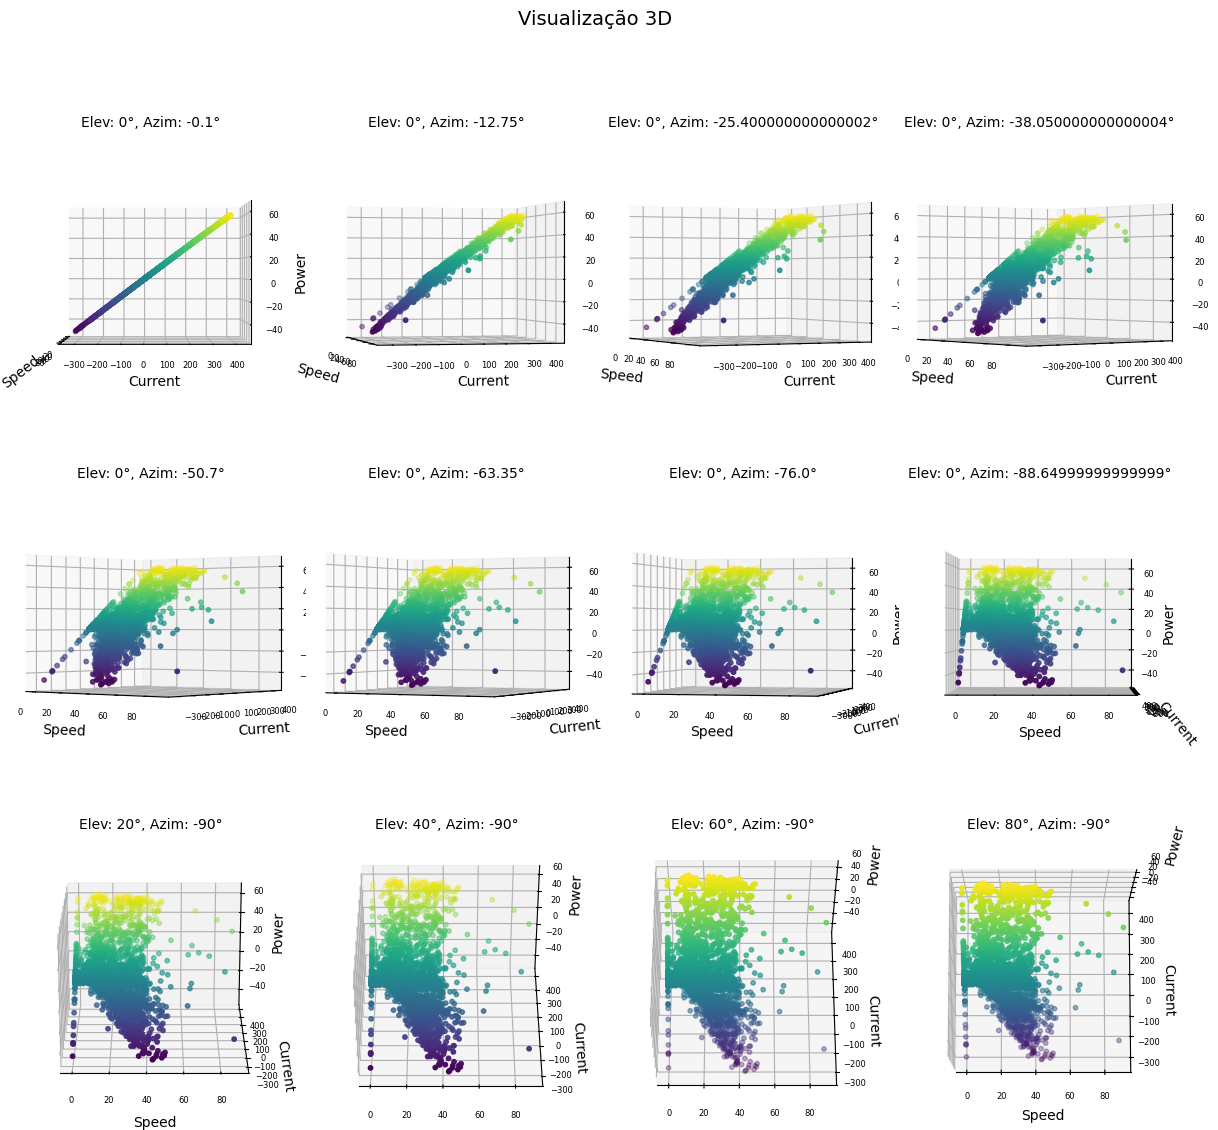

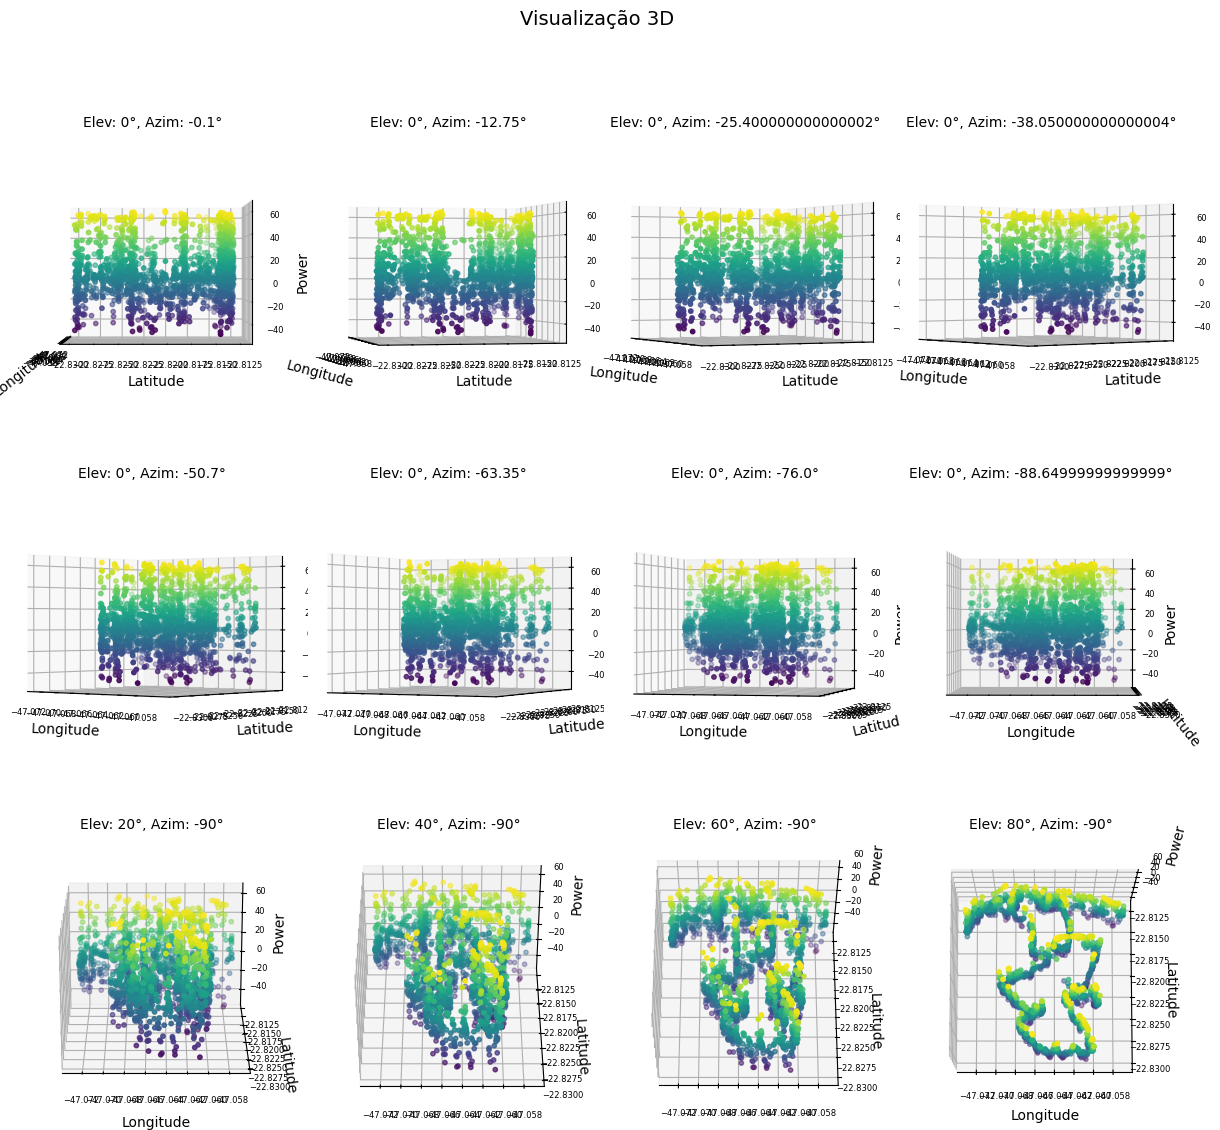

In [16]:
grafico_3d_multiplos_angulos(dados = dados_treino, x = "current", y = "speed", z = "power")
grafico_3d_multiplos_angulos(dados = dados_treino, x = "latitude", y = "longitude", z = "power")

## Tabelas 

### $\text{R}^2$

In [17]:
tabela = calcular_r_quadrado(dados = dados_treino,
                             dicionario_memoria = regressao_univariada,
                             nome_complementar = "_univariada")
tabela

Criando tabela para:
	f(voltage) -> power
	f(current) -> power
	f(speed) -> power
	f(latitude) -> power
	f(longitude) -> power
	f(soc) -> power



,tipo,entradas,saida,r^2,mse
0,Regressão,voltage,power,0.636109,366.417321
1,Rede Neural,voltage,power,0.711184,309.071730
2,Regressão,current,power,0.999947,0.051274
3,Rede Neural,current,power,0.999985,0.023441
4,Regressão,speed,power,0.429545,523.669549
5,Rede Neural,speed,power,0.449653,509.418705
6,Regressão,latitude,power,0.415645,529.941163
7,Rede Neural,latitude,power,0.408019,519.909523
8,Regressão,longitude,power,0.409879,527.787981
9,Rede Neural,longitude,power,0.417842,525.891891


In [18]:
tabela = calcular_r_quadrado(dados = dados_treino,
                             dicionario_memoria = regressao_multivariada,
                             nome_complementar = "_multivariada")
tabela

Criando tabela para:
	f(current, voltage, speed) -> power
	f(current, speed) -> power
	f(latitude, longitude, speed) -> power
	f(latitude, longitude) -> power
	f(latitude, speed) -> power
	f(longitude, speed) -> power



,tipo,entradas,saida,r^2,mse
0,Regressão,"current, voltage, speed",power,0.636109,0.042729
1,Rede Neural,"current, voltage, speed",power,0.711184,0.001961
2,Regressão,"current, speed",power,0.999947,0.046218
3,Rede Neural,"current, speed",power,0.999985,0.028913
4,Regressão,"latitude, longitude, speed",power,0.429545,511.810962
5,Rede Neural,"latitude, longitude, speed",power,0.449653,436.695536
6,Regressão,"latitude, longitude",power,0.415645,523.587965
7,Rede Neural,"latitude, longitude",power,0.408019,515.566894
8,Regressão,"latitude, speed",power,0.409879,520.513202
9,Rede Neural,"latitude, speed",power,0.417842,501.470146
